In [1]:
import pandas as pd
import numpy as np

In [2]:
df_orig = pd.read_csv('./data/pipe_dataset.csv', encoding='cp949')
df_orig


,date,temp,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용
0,2021121012,6.9,10.4,262.1,0.6,0.0,66.2,많음,29,양지,가정용
1,2021121013,7.3,11.8,274.0,0.5,0.0,62.5,많음,29,양지,가정용
2,2021121014,7.6,13.6,296.3,0.9,0.0,58.0,많음,29,양지,가정용
3,2021121015,8.1,14.2,83.0,1.4,0.0,56.8,많음,29,양지,가정용
4,2021121016,8.5,13.9,121.3,1.1,0.0,59.5,많음,29,양지,가정용
...,...,...,...,...,...,...,...,...,...,...,...
8167,2022030820,3.7,5.3,0.0,0.3,0.0,39.8,많음,18,양지,일반용
8168,2022030821,3.6,3.7,0.0,0.3,0.0,45.8,많음,18,양지,일반용
8169,2022030822,3.4,2.2,0.0,0.0,0.0,50.3,많음,18,양지,일반용
8170,2022030823,3.2,1.0,0.0,0.1,0.0,56.1,많음,18,양지,일반용


In [3]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8172 entries, 0 to 8171
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8172 non-null   int64  
 1   temp     8172 non-null   object 
 2   기온(°C)   7836 non-null   float64
 3   풍향(deg)  7800 non-null   float64
 4   풍속(m/s)  7800 non-null   float64
 5   강수량(mm)  7940 non-null   float64
 6   습도       8068 non-null   float64
 7   보온재      8172 non-null   object 
 8   고도       8172 non-null   int64  
 9   음/양지     8172 non-null   object 
 10  가정용/일반용  8172 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 702.4+ KB


가정용/일반용
가정용    4086
일반용    4086
Name: count, dtype: int64

* 데이터 전처리

In [6]:
#df_orig['가정용/일반용'].value_counts()
df_orig['temp'].value_counts()

temp
-        436
1.5      188
1.7      186
1.6      180
1.8      168
        ... 
9.1        2
(4.9)      2
(7.7)      2
(7.9)      2
(4.0)      2
Name: count, Length: 132, dtype: int64

In [28]:
#df_orig['temp'] = pd.to_numeric(df_orig['temp'])
df_orig['temp'] = pd.to_numeric(df_orig['temp'], errors='coerce')

In [29]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8172 entries, 0 to 8171
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8172 non-null   int64  
 1   temp     5498 non-null   float64
 2   기온(°C)   7836 non-null   float64
 3   풍향(deg)  7800 non-null   float64
 4   풍속(m/s)  7800 non-null   float64
 5   강수량(mm)  7940 non-null   float64
 6   습도       8068 non-null   float64
 7   보온재      8172 non-null   object 
 8   고도       8172 non-null   int64  
 9   음/양지     8172 non-null   object 
 10  가정용/일반용  8172 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 702.4+ KB


In [30]:
df_orig['sun'] = df_orig['음/양지'].replace(['양지','음지'],[1,0])
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8172 entries, 0 to 8171
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8172 non-null   int64  
 1   temp     5498 non-null   float64
 2   기온(°C)   7836 non-null   float64
 3   풍향(deg)  7800 non-null   float64
 4   풍속(m/s)  7800 non-null   float64
 5   강수량(mm)  7940 non-null   float64
 6   습도       8068 non-null   float64
 7   보온재      8172 non-null   object 
 8   고도       8172 non-null   int64  
 9   음/양지     8172 non-null   object 
 10  가정용/일반용  8172 non-null   object 
 11  sun      8172 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 766.2+ KB


C:\Users\kwater\AppData\Local\Temp\ipykernel_2004\3669900796.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_orig['sun'] = df_orig['음/양지'].replace(['양지','음지'],[1,0])


In [33]:
df_orig['house'] = df_orig['가정용/일반용'].replace(['가정용','일반용'],[1,0])
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8172 entries, 0 to 8171
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8172 non-null   int64  
 1   temp     5498 non-null   float64
 2   기온(°C)   7836 non-null   float64
 3   풍향(deg)  7800 non-null   float64
 4   풍속(m/s)  7800 non-null   float64
 5   강수량(mm)  7940 non-null   float64
 6   습도       8068 non-null   float64
 7   보온재      8172 non-null   object 
 8   고도       8172 non-null   int64  
 9   음/양지     8172 non-null   object 
 10  가정용/일반용  8172 non-null   object 
 11  sun      8172 non-null   int64  
 12  house    8172 non-null   int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 830.1+ KB


C:\Users\kwater\AppData\Local\Temp\ipykernel_2004\2078868977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_orig['house'] = df_orig['가정용/일반용'].replace(['가정용','일반용'],[1,0])


In [34]:
df_orig

,date,temp,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용,sun,house
0,2021121012,6.9,10.4,262.1,0.6,0.0,66.2,많음,29,양지,가정용,1,1
1,2021121013,7.3,11.8,274.0,0.5,0.0,62.5,많음,29,양지,가정용,1,1
2,2021121014,7.6,13.6,296.3,0.9,0.0,58.0,많음,29,양지,가정용,1,1
3,2021121015,8.1,14.2,83.0,1.4,0.0,56.8,많음,29,양지,가정용,1,1
4,2021121016,8.5,13.9,121.3,1.1,0.0,59.5,많음,29,양지,가정용,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8167,2022030820,3.7,5.3,0.0,0.3,0.0,39.8,많음,18,양지,일반용,1,0
8168,2022030821,3.6,3.7,0.0,0.3,0.0,45.8,많음,18,양지,일반용,1,0
8169,2022030822,3.4,2.2,0.0,0.0,0.0,50.3,많음,18,양지,일반용,1,0
8170,2022030823,3.2,1.0,0.0,0.1,0.0,56.1,많음,18,양지,일반용,1,0


In [398]:
#df.drop('date', axis=1, inplace=True)

# New Section

In [37]:
df_orig.isna().sum()

date          0
temp       2674
기온(°C)        0
풍향(deg)       0
풍속(m/s)       0
강수량(mm)       0
습도            0
보온재           0
고도            0
음/양지          0
가정용/일반용       0
sun           0
house         0
dtype: int64

In [36]:
cols = ["기온(°C)", "풍속(m/s)", "강수량(mm)", "습도"]

for col in cols:
    df_orig[col] = df_orig[col].fillna(method='ffill')
  

cols = ["풍향(deg)"]

for col in cols:
    df_orig[col] = df_orig[col].fillna(df[col].mean()) #중앙값, mean(), fillna(method='ffill')/fillna(method='backfill')



C:\Users\kwater\AppData\Local\Temp\ipykernel_2004\3391205992.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_orig[col] = df_orig[col].fillna(method='ffill')


In [404]:
# SKlearn의 라벨 인코더를 적용해본다. 

from sklearn.preprocessing import LabelEncoder as LE

lbls =["보온재", "음/양지", "가정용/일반용"]
for lbl in lbls:
    df[lbl] = LE().fit_transform(df[lbl])
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [405]:
#df_orig.tail(10)
df.head(50)

,temp,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용
0,6,10.4,262.100000,0.6,0.0,66.2,0,29.0,0,0
1,7,11.8,274.000000,0.5,0.0,62.5,0,29.0,0,0
2,7,13.6,296.300000,0.9,0.0,58.0,0,29.0,0,0
3,8,14.2,83.000000,1.4,0.0,56.8,0,29.0,0,0
4,8,13.9,121.300000,1.1,0.0,59.5,0,29.0,0,0
5,8,11.7,77.300000,0.7,0.0,67.9,0,29.0,0,0
6,8,11.1,269.400000,1.2,0.0,66.5,0,29.0,0,0
7,7,7.5,0.000000,0.4,0.0,80.3,0,29.0,0,0
8,7,5.7,0.000000,0.1,0.0,90.9,0,29.0,0,0
9,7,4.5,0.000000,0.1,0.0,97.9,0,29.0,0,0


In [406]:
# ctgs = ["보온재", "음/양지", "가정용/일반용"]
ctgs = ["음/양지", "가정용/일반용"]
for ctg in ctgs:
     df[ctg] = df[ctg].astype("category")
    
df = pd.get_dummies(df)


# ctgs = ["보온재", "음/양지", "가정용/일반용"]
# #ctgs = ["음/양지", "가정용/일반용"]

# for ctg in ctgs:
#     df_orig[ctg] = df_orig[ctg].astype("category")
    
# df = pd.get_dummies(df_orig)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [407]:
df

,temp,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지_0,음/양지_1,가정용/일반용_0,가정용/일반용_1
0,6,10.4,262.1,0.6,0.0,66.2,0,29.0,1,0,1,0
1,7,11.8,274.0,0.5,0.0,62.5,0,29.0,1,0,1,0
2,7,13.6,296.3,0.9,0.0,58.0,0,29.0,1,0,1,0
3,8,14.2,83.0,1.4,0.0,56.8,0,29.0,1,0,1,0
4,8,13.9,121.3,1.1,0.0,59.5,0,29.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8167,3,5.3,0.0,0.3,0.0,39.8,0,18.0,1,0,0,1
8168,3,3.7,0.0,0.3,0.0,45.8,0,18.0,1,0,0,1
8169,3,2.2,0.0,0.0,0.0,50.3,0,18.0,1,0,0,1
8170,3,1.0,0.0,0.1,0.0,56.1,0,18.0,1,0,0,1


In [408]:
from sklearn.preprocessing import MinMaxScaler

#scales=["함내온도", "기온(°C)", "풍속(m/s)", "강수량(mm)", "습도", "고도"]
scales=["기온(°C)", "풍향(deg)", "풍속(m/s)", "강수량(mm)", "습도", "고도"]

min = MinMaxScaler()
min.fit(df[scales])
df[scales] = min.transform(df[scales])

In [409]:
#df = df.iloc[:500] # 데이터프레임 커트 테스트
df

,temp,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지_0,음/양지_1,가정용/일반용_0,가정용/일반용_1
0,6,0.764901,0.728460,0.040000,0.0,0.645017,0,1.0,1,0,1,0
1,7,0.811258,0.761534,0.033333,0.0,0.603583,0,1.0,1,0,1,0
2,7,0.870861,0.823513,0.060000,0.0,0.553191,0,1.0,1,0,1,0
3,8,0.890728,0.230684,0.093333,0.0,0.539754,0,1.0,1,0,1,0
4,8,0.880795,0.337132,0.073333,0.0,0.569989,0,1.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8167,3,0.596026,0.000000,0.020000,0.0,0.349384,0,0.0,1,0,0,1
8168,3,0.543046,0.000000,0.020000,0.0,0.416573,0,0.0,1,0,0,1
8169,3,0.493377,0.000000,0.000000,0.0,0.466965,0,0.0,1,0,0,1
8170,3,0.453642,0.000000,0.006667,0.0,0.531915,0,0.0,1,0,0,1


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 8171
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       7736 non-null   int64  
 1   기온(°C)     7736 non-null   float64
 2   풍향(deg)    7736 non-null   float64
 3   풍속(m/s)    7736 non-null   float64
 4   강수량(mm)    7736 non-null   float64
 5   습도         7736 non-null   float64
 6   보온재        7736 non-null   int64  
 7   고도         7736 non-null   float64
 8   음/양지_0     7736 non-null   uint8  
 9   음/양지_1     7736 non-null   uint8  
 10  가정용/일반용_0  7736 non-null   uint8  
 11  가정용/일반용_1  7736 non-null   uint8  
dtypes: float64(6), int64(2), uint8(4)
memory usage: 574.2 KB


In [418]:
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df["temp"], test_size=0.2, stratify=df["temp"], random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(df.iloc[0:7736,1:], df["temp"], test_size=0.2, stratify=df["temp"], random_state=42)


x = df[['기온(°C)', '풍속(m/s)', '습도', '고도', '음/양지_0', '음/양지_1', '가정용/일반용_0', '가정용/일반용_1']]
y = df['temp']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)



In [419]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5415, 8), (2321, 8), (5415,), (2321,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300)
#model = RandomForestClassifier(n_estimators=300, max_depth=4, min_samples_leaf=2, min_samples_split=2)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})

result.head(40)

In [452]:
from sklearn.metrics import mean_absolute_error

print('MAE score:', mean_absolute_error(y_test, y_pred))

# result['ratio(%)'] = abs((result['pred'] - result['real']) / result['real']) * 100
# result.head(100)

MAE score: 0.9560534252477381


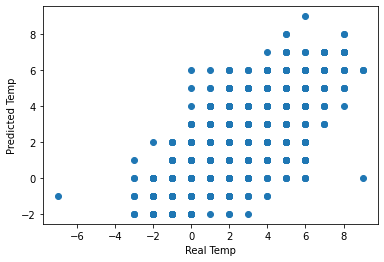

In [463]:
plt.scatter(y_test, y_pred)
plt.xlabel('Real Temp')
plt.ylabel('Predicted Temp')
plt.show()

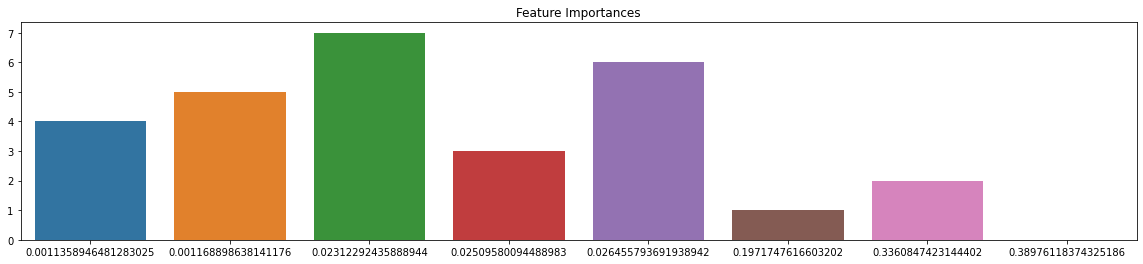

In [447]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(20, 4))
plt.title('Feature Importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)


In [460]:
# import seaborn as sns
# sns.lineplot(data=df, x="y_pred", y="y_test", color="blue")

print([y_pred-y_test])



[3040    0
1255    0
3054    0
7117    0
4809    1
       ..
6247   -1
4377    0
1146   -1
1215    2
8158    2
Name: temp, Length: 2321, dtype: int64]


In [461]:
from sklearn.metrics import accuracy_score

predicted = model.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.429
